# Importing Libraries

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
%matplotlib inline

In [3]:
#Generating tickers, date to collect the data from and date to stop
ticker_list = "TSLA NVDA TWTR ^NDX"
ticker_company = "Tesla Nvidia Twitter Nasdaq100"
start_date = dt.date(2014, 1, 1)
end_date = dt.date(2021, 12, 31)

In [4]:
# Pulling the data from yahoo finance
data = yf.download (
    tickers = ticker_list,
    start = str(start_date),
    end = str(end_date),
    group_by = 'ticker',
    auto_adjust = True,
    actions = True)

[*********************100%***********************]  4 of 4 completed


In [5]:
data.head()

^NDX                                                     \
                   Open         High          Low        Close      Volume   
Date                                                                         
2013-12-31  3576.239990  3592.000000  3575.250000  3592.000000  1401140000   
2014-01-02  3575.600098  3577.030029  3553.649902  3563.570068  1738820000   
2014-01-03  3564.939941  3567.510010  3537.610107  3538.729980  1667480000   
2014-01-06  3539.020020  3542.520020  3512.449951  3526.959961  2292840000   
2014-01-07  3539.290039  3562.989990  3535.500000  3557.850098  2278220000   

                                        TSLA                        ...  \
           Dividends Stock Splits       Open       High        Low  ...   
Date                                                                ...   
2013-12-31         0            0  30.464001  30.639999  29.732000  ...   
2014-01-02         0            0  29.959999  30.496000  29.309999  ...   
2014-01-03         0            0  30.000000  30.438000  29.719999  ...   
2014-01-06         0            0  30.000000  30.080000  29.048000  ...   
2014-01-07         0            0  29.524000  30.080000  29.049999  ...   

                TWTR                             NVDA                      \
              Volume Dividends Stock Splits      Open      High       Low   
Date                                                                        
2013-12-31  27814600         0            0  3.778304  3.801918  3.754689   
2014-01-02  29246400         0            0  3.759412  3.773581  3.712183   
2014-01-03  33207200         0            0  3.752328  3.759412  3.688569   
2014-01-06  27243700         0            0  3.738160  3.778304  3.702738   
2014-01-07  31748400         0            0  3.787750  3.825533  3.761774   

                                                       
               Close    Volume Dividends Stock Splits  
Date                                                   
2013-12-31  3.783027  23577600       0.0          0.0  
2014-01-02  3.745243  26009200       0.0          0.0  
2014-01-03  3.700376  25933200       0.0          0.0  
2014-01-06  3.749967  40949200       0.0          0.0  
2014-01-07  3.811364  33328800       0.0          0.0  

[5 rows x 28 columns]

In [6]:
data.columns.names = ['ticker', 'features']

In [7]:
data.head()

ticker             ^NDX                                                     \
features           Open         High          Low        Close      Volume   
Date                                                                         
2013-12-31  3576.239990  3592.000000  3575.250000  3592.000000  1401140000   
2014-01-02  3575.600098  3577.030029  3553.649902  3563.570068  1738820000   
2014-01-03  3564.939941  3567.510010  3537.610107  3538.729980  1667480000   
2014-01-06  3539.020020  3542.520020  3512.449951  3526.959961  2292840000   
2014-01-07  3539.290039  3562.989990  3535.500000  3557.850098  2278220000   

ticker                                  TSLA                        ...  \
features   Dividends Stock Splits       Open       High        Low  ...   
Date                                                                ...   
2013-12-31         0            0  30.464001  30.639999  29.732000  ...   
2014-01-02         0            0  29.959999  30.496000  29.309999  ...   
2014-01-03         0            0  30.000000  30.438000  29.719999  ...   
2014-01-06         0            0  30.000000  30.080000  29.048000  ...   
2014-01-07         0            0  29.524000  30.080000  29.049999  ...   

ticker          TWTR                             NVDA                      \
features      Volume Dividends Stock Splits      Open      High       Low   
Date                                                                        
2013-12-31  27814600         0            0  3.778304  3.801918  3.754689   
2014-01-02  29246400         0            0  3.759412  3.773581  3.712183   
2014-01-03  33207200         0            0  3.752328  3.759412  3.688569   
2014-01-06  27243700         0            0  3.738160  3.778304  3.702738   
2014-01-07  31748400         0            0  3.787750  3.825533  3.761774   

ticker                                                 
features       Close    Volume Dividends Stock Splits  
Date                                                   
2013-12-31  3.783027  23577600       0.0          0.0  
2014-01-02  3.745243  26009200       0.0          0.0  
2014-01-03  3.700376  25933200       0.0          0.0  
2014-01-06  3.749967  40949200       0.0          0.0  
2014-01-07  3.811364  33328800       0.0          0.0  

[5 rows x 28 columns]

In [8]:
#Stacked the ticker column into the index creating a multi-index dataframe
data_df = data.stack(0)

In [9]:
data_df.tail()

features                  Close  Dividends          High           Low  \
Date       ticker                                                        
2021-12-29 ^NDX    16491.009766        0.0  16548.919922  16396.160156   
2021-12-30 NVDA      295.809601        0.0    304.518139    295.349688   
           TSLA     1070.339966        0.0   1095.550049   1053.150024   
           TWTR       44.459999        0.0     45.090000     42.630001   
           ^NDX    16429.099609        0.0  16569.619141  16415.119141   

features                   Open  Stock Splits      Volume  
Date       ticker                                          
2021-12-29 ^NDX    16510.630859           0.0  3694500000  
2021-12-30 NVDA      298.219194           0.0    30886400  
           TSLA     1061.329956           0.0    15680300  
           TWTR       42.770000           0.0    14541100  
           ^NDX    16485.400391           0.0  3732730000

In [10]:
data_df.reset_index().ticker.value_counts()

NVDA    2015
TSLA    2015
TWTR    2015
^NDX    2015
Name: ticker, dtype: int64

In [11]:
#Saving to excel for explopration
#data_df.to_excel("fin_data.xlsx", sheet_name="Stocks")

# Exploration

In [12]:
data_df.head()

features                 Close  Dividends         High          Low  \
Date       ticker                                                     
2013-12-31 NVDA       3.783027        0.0     3.801918     3.754689   
           TSLA      30.086000        0.0    30.639999    29.732000   
           TWTR      63.650002        0.0    65.220001    61.650002   
           ^NDX    3592.000000        0.0  3592.000000  3575.250000   
2014-01-02 NVDA       3.745243        0.0     3.773581     3.712183   

features                  Open  Stock Splits      Volume  
Date       ticker                                         
2013-12-31 NVDA       3.778304           0.0    23577600  
           TSLA      30.464001           0.0    21312000  
           TWTR      62.360001           0.0    27814600  
           ^NDX    3576.239990           0.0  1401140000  
2014-01-02 NVDA       3.759412           0.0    26009200

In [13]:
# Unstacked the ticker index to column and selected the columns to use for EDA
invest_data = data_df[['Close', 'Volume']].unstack().iloc[1:]

In [14]:
invest_data.head()

features       Close                                       Volume            \
ticker          NVDA       TSLA       TWTR         ^NDX      NVDA      TSLA   
Date                                                                          
2014-01-02  3.745243  30.020000  67.500000  3563.570068  26009200  30942000   
2014-01-03  3.700376  29.912001  69.000000  3538.729980  25933200  23475000   
2014-01-06  3.749967  29.400000  66.290001  3526.959961  40949200  26805500   
2014-01-07  3.811364  29.872000  61.459999  3557.850098  33328800  25170500   
2014-01-08  3.863316  30.256001  59.290001  3567.540039  30819200  30816000   

features                          
ticker          TWTR        ^NDX  
Date                              
2014-01-02  29246400  1738820000  
2014-01-03  33207200  1667480000  
2014-01-06  27243700  2292840000  
2014-01-07  31748400  2278220000  
2014-01-08  27263200  2345220000

In [40]:
# Saving the file to use for building the panel dashboard
invest_data.to_excel('fin_main_sheet.xlsx')

## Percent Change in Price and Volume Traded

In [16]:
# Creating a dataframe that calculates the percent change of the closing price and volume of stocks traded
# using the closing price of the last trading day of the year
new_data = []

for year in range(start_date.year, end_date.year):
    new_data.append(invest_data.loc[str(year)].iloc[-1])
    
invest_data_pct_chg = pd.DataFrame(new_data).pct_change().apply(lambda x : round(x*100, 3))
invest_data_pct_chg.head()

features      Close                           Volume                        
ticker         NVDA    TSLA    TWTR    ^NDX     NVDA    TSLA    TWTR    ^NDX
2014-12-31      NaN     NaN     NaN     NaN      NaN     NaN     NaN     NaN
2015-12-31   67.116   7.913 -35.489   8.427  -10.687  18.172  10.494  -5.154
2016-12-30  226.960 -10.966 -29.559   5.886  716.635  70.998 -28.055   7.885
2017-12-29   81.988  45.702  47.301  31.516  -76.918 -18.640 -25.836   1.348
2018-12-31  -30.815   6.889  19.700  -1.039   66.143  66.851  53.699  33.519

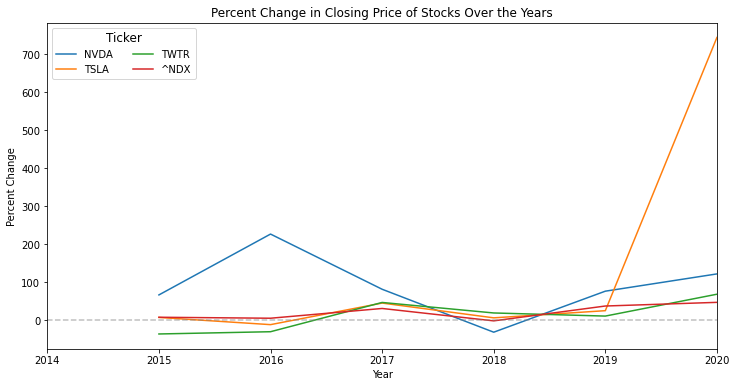

In [17]:
# Plotting the percent change dataframe
ax = invest_data_pct_chg.loc[:, 'Close'].plot(kind='line', figsize=(12, 6), 
                                             title='Percent Change in Closing Price of Stocks Over the Years',
                                             xlabel='Year',
                                             ylabel='Percent Change', rot=0)
ax.axhline(alpha=0.5, linestyle='--', c='gray')
ax.legend(ncol=2, title='Ticker', title_fontsize='large')

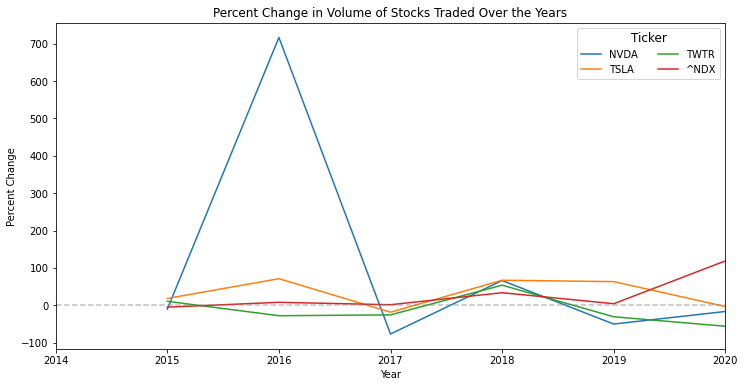

In [18]:
ax = invest_data_pct_chg.loc[:, 'Volume'].plot(kind='line', figsize=(12, 6), 
                                             title='Percent Change in Volume of Stocks Traded Over the Years',
                                             xlabel='Year',
                                             ylabel='Percent Change', rot=0)
ax.axhline(alpha=0.5, linestyle='--', c='gray')
ax.legend(ncol=2, title='Ticker', title_fontsize='large')

## Returns
#### Calculating the return on an investment in percent

In [19]:
invest_data_log = np.log(invest_data / invest_data.shift())
invest_data_log.head()

features       Close                                  Volume            \
ticker          NVDA      TSLA      TWTR      ^NDX      NVDA      TSLA   
Date                                                                     
2014-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-03 -0.012052 -0.003604  0.021979 -0.006995 -0.002926 -0.276178   
2014-01-06  0.013313 -0.017265 -0.040067 -0.003332  0.456808  0.132671   
2014-01-07  0.016240  0.015927 -0.075653  0.008720 -0.205910 -0.062934   
2014-01-08  0.013539  0.012773 -0.035946  0.002720 -0.078284  0.202361   

features                        
ticker          TWTR      ^NDX  
Date                            
2014-01-02       NaN       NaN  
2014-01-03  0.127010 -0.041893  
2014-01-06 -0.197944  0.318478  
2014-01-07  0.153020 -0.006397  
2014-01-08 -0.152305  0.028985

In [20]:
stock_return = pd.DataFrame(np.exp(invest_data_log.sum())).unstack() * 100
stock_return = stock_return.transpose().reset_index().set_index('ticker').drop('level_0', axis=1)
stock_return

features,Close,Volume
ticker,,
NVDA,7898.274592,118.751826
TSLA,3565.422883,50.676427
TWTR,65.866665,49.719282
^NDX,461.029229,214.670294


Text(0.5, 1.0, 'Tickers Returns')

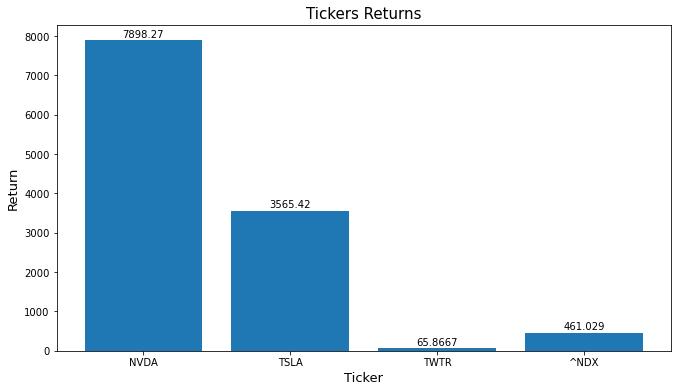

In [21]:
plt.figure(figsize=(11, 6))
return_close = plt.bar(x = stock_return.index, height = stock_return['Close'])
plt.bar_label(return_close, padding=1)

plt.ylabel('Return', fontdict= {'fontsize':13})
plt.xlabel('Ticker', fontdict= {'fontsize':13})
plt.title('Tickers Returns', fontdict= {'fontsize':15})

## Normalizing the data to compare the change in closing price between stocks

In [22]:
invest_data_exp = invest_data_log.cumsum().apply(np.exp)

In [23]:
invest_data_exp.head()

features       Close                                  Volume            \
ticker          NVDA      TSLA      TWTR      ^NDX      NVDA      TSLA   
Date                                                                     
2014-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-03  0.988020  0.996402  1.022222  0.993029  0.997078  0.758678   
2014-01-06  1.001261  0.979347  0.982074  0.989727  1.574412  0.866314   
2014-01-07  1.017655  0.995070  0.910519  0.998395  1.281423  0.813474   
2014-01-08  1.031526  1.007861  0.878370  1.001114  1.184935  0.995928   

features                        
ticker          TWTR      ^NDX  
Date                            
2014-01-02       NaN       NaN  
2014-01-03  1.135429  0.958972  
2014-01-06  0.931523  1.318618  
2014-01-07  1.085549  1.310210  
2014-01-08  0.932190  1.348742

## Visualizing Closing price between Nvidia, Twitter and Tesla over the years

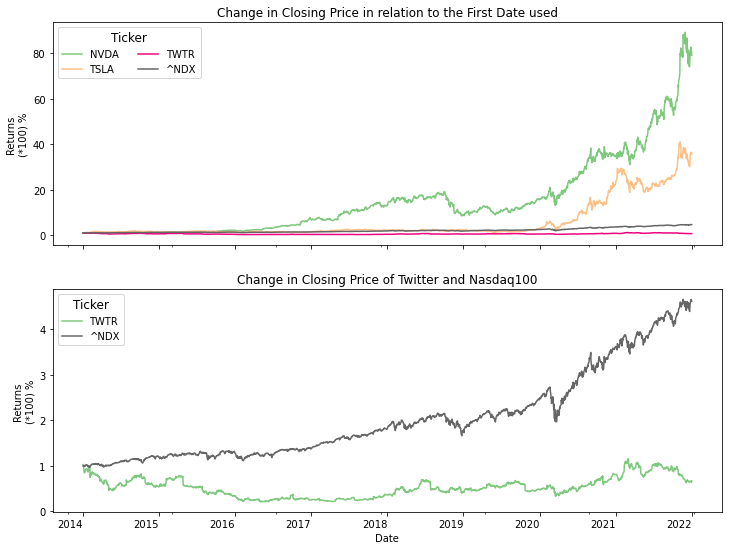

In [24]:
fig, axes = plt.subplots(2, sharex=True)

ax1 = invest_data_exp['Close'].plot(figsize=(12,10), ax=axes[0], ylabel='Returns \n(*100) %', 
                                    title='Change in Closing Price in relation to the First Date used',
                                   cmap = 'Accent')
ax2 = invest_data_exp['Close'][['TWTR', '^NDX']].plot(figsize=(12,10), ax=axes[1], ylabel='Returns \n(*100) %', 
                                                    xlabel = 'Date', cmap='Accent',
                                                     title = 'Change in Closing Price of Twitter and Nasdaq100',
                                                     rot=0)

ax1.legend(ncol=2, title='Ticker', title_fontsize='large')
ax2.legend(title='Ticker', title_fontsize='large')

## Visualizing covid era

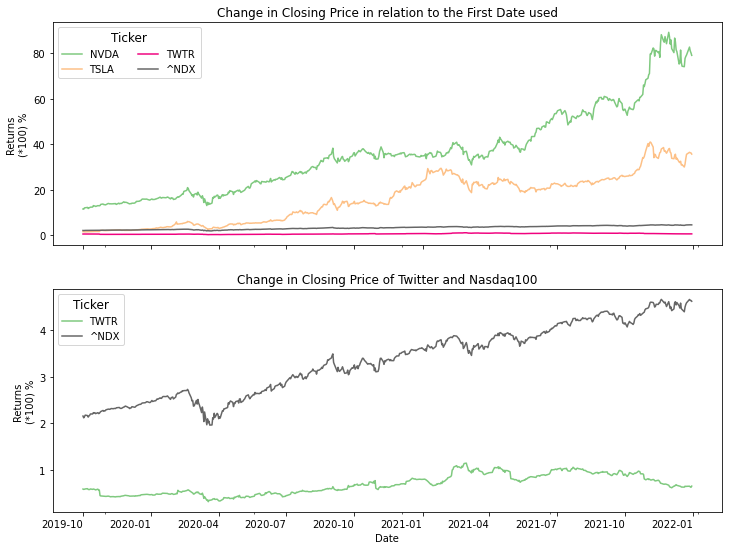

In [25]:
fig, axes = plt.subplots(2, sharex=True)

ax1 = invest_data_exp['2019-Q4': '2022']['Close'].plot(
    figsize=(12,10), ax=axes[0], ylabel='Returns \n(*100) %',
    title='Change in Closing Price in relation to the First Date used', cmap='Accent')
ax2 = invest_data_exp['2019-Q4': '2022']['Close'][['TWTR', '^NDX']].plot(
    figsize=(12,10), ax=axes[1], ylabel='Returns \n(*100) %', cmap = 'Accent',
    title = 'Change in Closing Price of Twitter and Nasdaq100', rot = 0)

ax1.legend(ncol=2, title='Ticker', title_fontsize='large')
ax2.legend(title='Ticker', title_fontsize='large')

## Compound Annual Growth rate (CAGR)
#### Yearly return of an investment

In [26]:
invest_data_close = invest_data['Close']
invest_data_close.head()

ticker,NVDA,TSLA,TWTR,^NDX
Date,,,,
2014-01-02,3.745243,30.020000,67.500000,3563.570068
2014-01-03,3.700376,29.912001,69.000000,3538.729980
2014-01-06,3.749967,29.400000,66.290001,3526.959961
2014-01-07,3.811364,29.872000,61.459999,3557.850098
2014-01-08,3.863316,30.256001,59.290001,3567.540039


In [27]:
# Creating a function to calculate the cagr of a stock during several periods (total, pre-covid, covid)

ticker_cagr = {'cagr_value':{}, 'cagr_percent':{}}

def cagr_time(time, tickers):
    for ticker in tickers.columns:
        if time == 'Total':
            cagr_df = invest_data_close[ticker].dropna()
        elif time == 'Pre-covid':
            cagr_df = invest_data_close.loc[:'2019', ticker].dropna()
        else:
            cagr_df = invest_data_close.loc['2020':, ticker].dropna()
            
        years = round(((cagr_df.index.max() - cagr_df.index.min()).days)/365, 0)
        end = cagr_df.iloc[-1]
        start = cagr_df.iloc[0]
        cagr_value = (end / start) ** (1/years) - 1
        ticker_cagr['cagr_value'].update({ticker : cagr_value})
        ticker_cagr['cagr_percent'].update({ticker : cagr_value * 100})
        
    return_df = pd.DataFrame(ticker_cagr)
    return_df.index.names = ['ticker']
    return_df['time'] = time
    return return_df.reset_index().set_index(['time', 'ticker'])

In [28]:
ticker_cagr_total = cagr_time('Total', invest_data_close)
ticker_cagr_precovid = cagr_time('Pre-covid', invest_data_close)
ticker_cagr_postcovid = cagr_time('Post-covid', invest_data_close)

In [29]:
cagr = pd.concat([ticker_cagr_total,
              ticker_cagr_precovid,
              ticker_cagr_postcovid])
cagr

cagr_value  cagr_percent
time       ticker                          
Total      NVDA      0.726599     72.659917
           TSLA      0.563198     56.319760
           TWTR     -0.050854     -5.085359
           ^NDX      0.210504     21.050352
Pre-covid  NVDA      0.581802     58.180203
           TSLA      0.186287     18.628686
           TWTR     -0.116742    -11.674242
           ^NDX      0.161128     16.112848
Post-covid NVDA      1.223804    122.380432
           TSLA      2.526796    252.679634
           TWTR      0.173231     17.323084
           ^NDX      0.360789     36.078883

## Maximum Dropdown
#### Max observed loss from a peak to a trough of a portfolio before a new peak is attained

In [30]:
# Creating a function to calculate the maximum drawdown of a stock during several periods (total, pre-covid, covid)

def max_drawdown(time):
    if time == 'Total':
        md_df = invest_data_close
    elif time == 'Pre-covid':
        md_df = invest_data_close.loc[:'2019']
    else:
        md_df = invest_data_close.loc['2020':]
            
    rolling_max = md_df.cummax()
    daily_drawdown = md_df/rolling_max - 1
    return_df = pd.DataFrame(daily_drawdown.cummin().iloc[-1])
    
    return_df.columns = return_df.columns.astype('str')
    for i in return_df.columns:
        col_name = i
    return_df.rename(columns={col_name:'max_drawdown_value'}, inplace=True)
    return_df = return_df.assign(max_drawdown_percent = lambda x: x.max_drawdown_value * 100)

    return_df['time'] = time
    return return_df.reset_index().set_index(['time', 'ticker'])

In [31]:
total_drawdown = max_drawdown('Total')
pre_covid_drawdown = max_drawdown('Pre-covid')
post_covid_drawdown = max_drawdown('Post-covid')

In [32]:
drawdown = pd.concat([
    total_drawdown,
    pre_covid_drawdown,
    post_covid_drawdown
])

drawdown

max_drawdown_value  max_drawdown_percent
time       ticker                                          
Total      NVDA             -0.560384            -56.038443
           TSLA             -0.606265            -60.626536
           TWTR             -0.796957            -79.695652
           ^NDX             -0.280329            -28.032884
Pre-covid  NVDA             -0.560384            -56.038443
           TSLA             -0.535143            -53.514287
           TWTR             -0.796957            -79.695652
           ^NDX             -0.229868            -22.986797
Post-covid NVDA             -0.375540            -37.554037
           TSLA             -0.606265            -60.626536
           TWTR             -0.458070            -45.807032
           ^NDX             -0.280329            -28.032884

## Volatitlity
#### Dispersion of return for a given security

In [33]:
invest_data_log.head()

features       Close                                  Volume            \
ticker          NVDA      TSLA      TWTR      ^NDX      NVDA      TSLA   
Date                                                                     
2014-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2014-01-03 -0.012052 -0.003604  0.021979 -0.006995 -0.002926 -0.276178   
2014-01-06  0.013313 -0.017265 -0.040067 -0.003332  0.456808  0.132671   
2014-01-07  0.016240  0.015927 -0.075653  0.008720 -0.205910 -0.062934   
2014-01-08  0.013539  0.012773 -0.035946  0.002720 -0.078284  0.202361   

features                        
ticker          TWTR      ^NDX  
Date                            
2014-01-02       NaN       NaN  
2014-01-03  0.127010 -0.041893  
2014-01-06 -0.197944  0.318478  
2014-01-07  0.153020 -0.006397  
2014-01-08 -0.152305  0.028985

In [34]:
# Creating a function to calculate the volatility of a stock during several periods (total, pre-covid, covid)

def volatility(time):
    if time == 'Total':
        md_df = invest_data_log['Close']
    elif time == 'Pre-covid':
        md_df = invest_data_log.loc[:'2019', 'Close']
    else:
        md_df = invest_data_log.loc['2020':, 'Close']
        
    return_df = pd.DataFrame(md_df.std()*(252**0.5))
    return_df.columns = return_df.columns.astype('str')
    for i in return_df.columns:
        col_name = i
    return_df.rename(columns={col_name:'volatility_value'}, inplace=True)
    return_df = return_df.assign(volatility_percent = lambda x: x.volatility_value * 100)

    return_df['time'] = time
    return return_df.reset_index().set_index(['time', 'ticker'])

In [35]:
total_volatility = volatility('Total')
pre_covid_volatility = volatility('Pre-covid')
post_covid_dvolatility = volatility('Post-covid')

In [36]:
volatility_df = pd.concat([total_volatility,
                          pre_covid_volatility,
                          post_covid_dvolatility])

volatility_df

volatility_value  volatility_percent
time       ticker                                      
Total      NVDA            0.432281           43.228090
           TSLA            0.541052           54.105245
           TWTR            0.534484           53.448432
           ^NDX            0.204819           20.481890
Pre-covid  NVDA            0.399426           39.942606
           TSLA            0.453435           45.343510
           TWTR            0.530664           53.066383
           ^NDX            0.166805           16.680474
Post-covid NVDA            0.518456           51.845617
           TSLA            0.742241           74.224086
           TWTR            0.546072           54.607160
           ^NDX            0.290352           29.035249

### Visualization of volatitlity

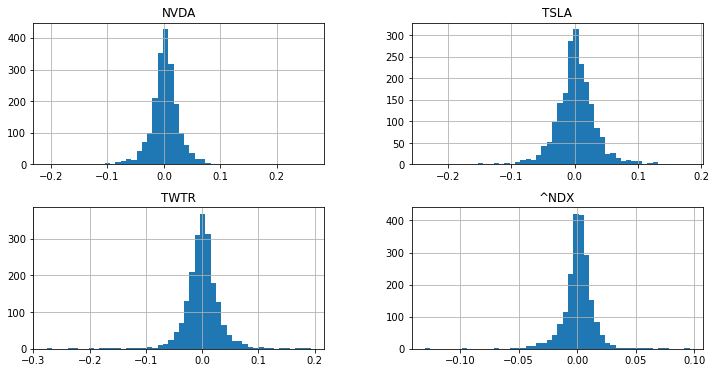

In [37]:
ax = invest_data_log['Close'].hist(bins=50, figsize=(12, 6))